##### Import NCC toolbox converted to Python

In [1]:
import numpy as np
from src.eeg_analysis.utils.NCC_converted_toolbox import gendata, pldist, plmle, plparams, plplottool
from src.eeg_analysis.analysis.criticality import PowerLawAnalyzer

##### Generate a sample power law distribution

In [2]:
tau = 1.0
lambda_ = 0.1
xmin = 20
xmax = 70

generated_data, xVals, pdf = gendata(5000, ['truncated_powerlaw', [tau, lambda_, xmin, xmax]], 'inf', 2, 'sup', 120)
print(generated_data)  # Generate 10000 samples from a discrete power-law with exponent 1.5

[  2.   2.   2. ... 106. 111. 112.]


{'x': [(array([  2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,  10.5,
           11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
           20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,
           29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,
           38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,
           47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,  54.5,  55.5,
           56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,  64.5,
           65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,
           74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,
           83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,  91.5,
           92.5,  96.5, 100.5, 102.5, 105. , 108.5, 111.5]),
   array([0.0732, 0.0674, 0.0592, 0.055 , 0.0492, 0.0434, 0.0414, 0.0406,
          0.0384, 0.031 , 0.0244, 0.0262, 0.0216, 0.0194, 0.0176, 0.0152,
          0.0174, 0.014 , 0.0138, 0.0136, 0.0122, 0.0122

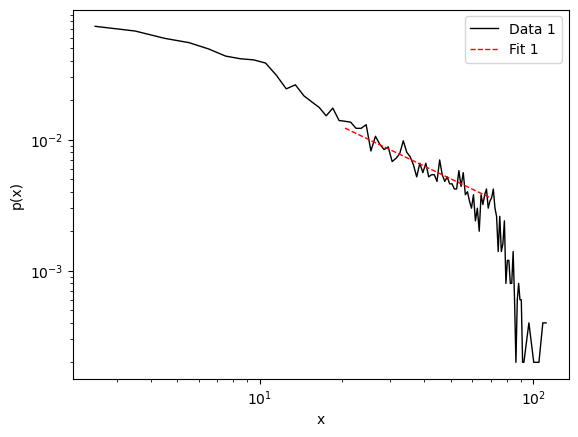

In [3]:
# Plot the data using plplottool
fitParams = {
    'tau':[1.0], 
    'color': [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0]],
    'linewidth': 1,
    'linestyle': '--',
    'dot': 'off',
    'dotsize': 5,
    'x2fit': [0],
    'xmin': [xmin],
    'xmax': [xmax]}

plplottool(generated_data, 'fitParams', fitParams)

##### Test the pldist fucntion for generating power-law distributed data

In [4]:
# x_min = 2
# x_max = 100
# slope = 1.5

# # Generate a double truncated power-law distributed data 
# generated_data = pldist(1000, 'slope', slope, 'double', x_min, x_max, 'plot')

##### Estimate the power law slope/exponent) using Maximum Likelihood Estimation (MLE)

In [5]:
tau, x_min, x_max, L = plmle(generated_data, 'xmin', xmin, 'xmax', xmax) 
print(f'tau: {tau}, x_min: {x_min}, x_max: {x_max}, Likelihood: {L}')

tau: 1.1900000000000002, x_min: 20, x_max: 70, Likelihood: [-3.83597276 -3.83585618 -3.83575334 -3.83566423 -3.83558885 -3.8355272
 -3.83547927 -3.83544507 -3.83542458 -3.8354178  -3.83542473 -3.83544537
 -3.8354797  -3.83552773 -3.83558945 -3.83566485 -3.83575393 -3.83585668
 -3.8359731  -3.83610318 -3.83624691 -3.83640429 -3.8365753  -3.83675996
 -3.83695823 -3.83717013 -3.83739563 -3.83763474 -3.83788744 -3.83815373
 -3.83843359]


In [6]:
# Trying to fit a non-truncated power-law distribution to the truncated data
tau, x_min, x_max, L = plmle(generated_data) 
print(f'tau: {tau}, x_min: {x_min}, x_max: {x_max}, Likelihood: {L}')

tau: 1.06, x_min: 2.0, x_max: 112.0, Likelihood: [-3.94846102 -3.94766811 -3.94702762 -3.94653948 -3.94620358 -3.94601979
 -3.94598795 -3.94610787 -3.94637934 -3.94680211 -3.9473759  -3.94810043
 -3.94897536 -3.95000034 -3.95117499 -3.95249891 -3.95397166 -3.9555928
 -3.95736184 -3.95927826 -3.96134155 -3.96355115 -3.96590648 -3.96840694
 -3.97105191 -3.97384075 -3.97677278 -3.97984733 -3.98306368 -3.9864211
 -3.98991886]


##### Estimating the parameters of truncated power law distribution fit using plparams  

In [7]:
num_samples = 100
tau, xmin, xmax, sigma, p, pCrit, ks = plparams(generated_data, 'samples', num_samples)
print(f'tau: {tau}, xmin: {xmin}, xmax: {xmax}, sigmaTau: {sigma}, p-value: {p}, critical p-value: {pCrit}, KS statistic: {ks}')

tau: 1.2700000000000002, xmin: 7.0, xmax: 85.0, sigmaTau: 0.023825196746302034, p-value: 0.12, critical p-value: 0.2, KS statistic: [0.01784570027592991, array([0.02114824, 0.01033316, 0.00897506, 0.01278563, 0.01557662,
       0.02128042, 0.01517423, 0.00939367, 0.00656168, 0.01937426,
       0.00918785, 0.01417993, 0.00832761, 0.01262354, 0.01323244,
       0.01413875, 0.0156902 , 0.01514955, 0.01076003, 0.01765562,
       0.01156713, 0.01383488, 0.01336419, 0.00690903, 0.01031947,
       0.0156555 , 0.01358558, 0.01057161, 0.02222609, 0.01575662,
       0.00637806, 0.0172677 , 0.01173741, 0.0178138 , 0.02174088,
       0.01148378, 0.00548243, 0.03065317, 0.01789144, 0.01129504,
       0.00965109, 0.01495288, 0.00760665, 0.01347352, 0.01472645,
       0.00946452, 0.01149633, 0.01503398, 0.01212228, 0.00714038,
       0.01446309, 0.01585625, 0.00851722, 0.01021761, 0.01528164,
       0.00936251, 0.00931327, 0.01128988, 0.0074682 , 0.01073394,
       0.00878303, 0.01104414, 0.01390285,

##### Test powerlaw package performance on the truncated power law data generated using NCC toolbox

In [8]:
import powerlaw 

# fitting with the right xmin and xmax, check if the powerlaw Fit class can find the right exponent
fit = powerlaw.Fit(generated_data, xmin=xmin, xmax=xmax, discrete=True)
print(f'powerlaw results with xmin and xmax given to the function:\nalpha: {fit.power_law.alpha}, D: {fit.power_law.D}')


# fitting without xmin and xmax
fit = powerlaw.Fit(generated_data, discrete=True)
print(f'powerlaw results without providing xmin and xmax:\nalpha: {fit.power_law.alpha}, D: {fit.power_law.D}, xmin: {fit.power_law.xmin}, xmax: {fit.power_law.xmax}')

powerlaw results with xmin and xmax given to the function:
alpha: 1.2661235212213757, D: 0.016351188477013334
Calculating best minimal value for power law fit
powerlaw results without providing xmin and xmax:
alpha: 8.41292493809836, D: 0.0896714763185783, xmin: 65.0, xmax: None


##### Test PowerLawAnalyzer in the criticality module on the truncated power law data generated using NCC toolbox
##### The PowerLawAnalyzer utilizes the powerlaw package, with the key difference being that both xmin and xmax are customized, since the powerlaw package does not automatically calculate xmax.

In [11]:
pla = PowerLawAnalyzer(generated_data)
fit = pla.compute_power_law_fits(start_value=np.min(generated_data), stop_value=np.max(generated_data), num_values=50)

print(f'PowerLawAnalyzer results without providing xmin and xmax:\nalpha: {fit.alpha}, D: {fit.D}, xmin: {fit.xmin}, xmax: {fit.xmax}')

c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\powerlaw.py:1243: RuntimeWarning: divide by zero encountered in scalar divide
  C = 1.0/C - 1.0/Cxmax
c:\Users\Kourosh\.conda\envs\capachinos_env\Lib\site-packages\powerlaw.py:1243: RuntimeWarning: invalid value encountered in scalar subtract
  C = 1.0/C - 1.0/Cxmax


PowerLawAnalyzer results without providing xmin and xmax:
alpha: 1.229824772805348, D: 0.010504281203181476, xmin: 10.979591836734693, xmax: 76.08163265306122


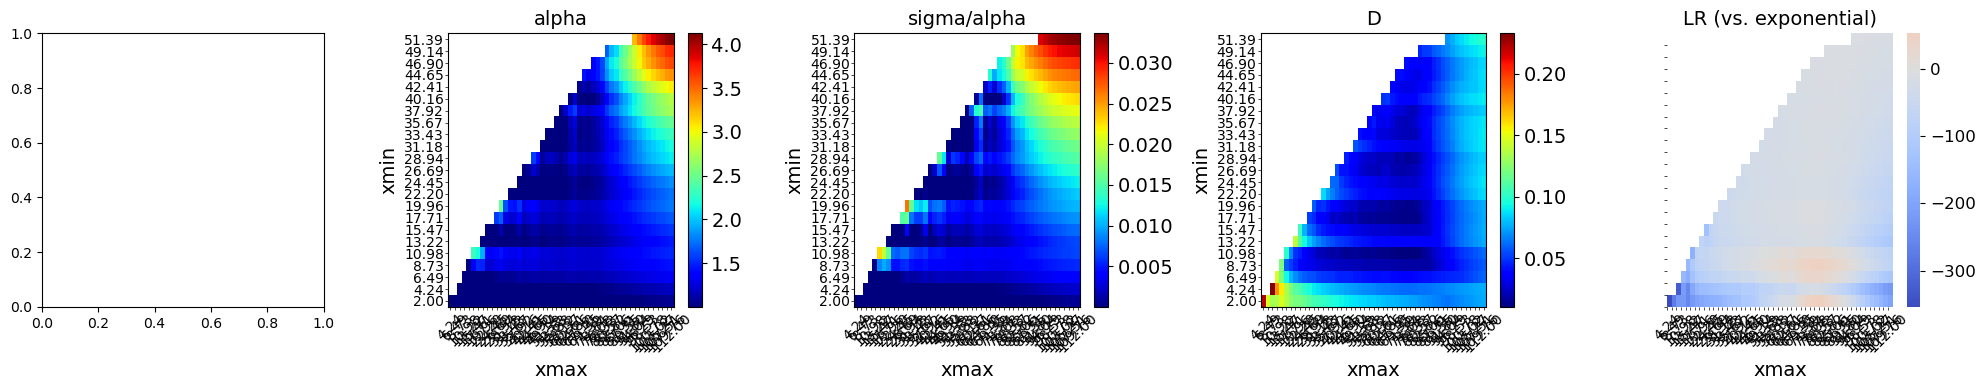

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

alpha_2d = fit.alpha_2d
D_2d = fit.D_2d
sigma_2d = fit.sigma_2d
R_exp_2d = fit.R_exp_2d

# trim the metrices to remove all nan rows or columns
valid_rows = np.nansum(alpha_2d, axis=1) > 0
valid_columns = np.nansum(alpha_2d, axis=0) > 0

alpha_2d_filtered = alpha_2d[valid_rows, :]   # First filter out invalid rows
alpha_2d_filtered = alpha_2d_filtered[:, valid_columns] 

D_2d_filtered = D_2d[valid_rows, :]   # First filter out invalid rows
D_2d_filtered = D_2d_filtered[:, valid_columns] 

sigma_2d_filtered = sigma_2d[valid_rows, :]   # First filter out invalid rows
sigma_2d_filtered = sigma_2d_filtered[:, valid_columns] 

R_exp_2d_filtered = R_exp_2d[valid_rows, :]   # First filter out invalid rows
R_exp_2d_filtered = R_exp_2d_filtered[:, valid_columns] 



xmins_set = sorted(set(fit.xmins))
xmaxs_set = sorted(set(fit.xmaxs))

# Apply logarithmic transformation to sigma_2d (using log10)
sigma_2d_log = np.log10(np.clip(sigma_2d, 1e-10, None))

# Define the figure and subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

def plot_heatmap(ax, data, title, show_ylabel=False, diverging_cmap=False):

    if diverging_cmap:
        im = sns.heatmap(data, cmap="coolwarm", center=0)
        ax.invert_yaxis()  
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=12)
        
    else:
        im = ax.imshow(data, origin='lower', aspect='auto', cmap='jet')
        # Add a colorbar
        cbar = fig.colorbar(im, ax=ax)
        cbar.ax.tick_params(labelsize=14)
        
    ax.set_xticks(np.arange(len(xmaxs_set)))
    ax.set_xticklabels([f"{x:.2f}" for x in xmaxs_set], rotation=45)
    ax.set_xlabel('xmax', fontsize=14)
    
    ax.set_yticks(np.arange(len(xmins_set)))
    if show_ylabel:
        ax.set_yticklabels([f"{x:.2f}" for x in xmins_set])
        ax.set_ylabel('xmin', fontsize=14)
    else:
        ax.set_yticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=10, length=2, width=0.5, pad=1)
    ax.set_title(title, fontsize=14)


# Prepare custom colorbar ticks and labels for sigma
sigma_ticks = np.logspace(np.log10(1e-10), np.log10(np.max(sigma_2d)), num=10)

plot_heatmap(axs[1], alpha_2d_filtered, 'alpha', show_ylabel=True)
plot_heatmap(axs[2], np.divide(sigma_2d_filtered, alpha_2d_filtered), 'sigma/alpha', show_ylabel=True)
plot_heatmap(axs[3], D_2d_filtered, 'D', show_ylabel=True)
plot_heatmap(axs[4], R_exp_2d_filtered, 'LR (vs. exponential)', diverging_cmap=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()